# Sales Statistics for 2019

In [13]:
import pandas as pd
import re
import os

#### Merging files to one dataframe

In [14]:
data_all = pd.DataFrame()

files  = [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    data_all = pd.concat([data_all,df])

In [15]:
data_all.to_csv('All_Months_data.csv')

In [16]:
all_data = pd.read_csv('All_Months_data.csv')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [18]:
all_data.info()
all_data = all_data.dropna()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186849 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        186849 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        186305 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        1

In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [20]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'] = all_data['month'].astype('int32')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [21]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [22]:
results = all_data.groupby('month').sum()

## Month sales plot

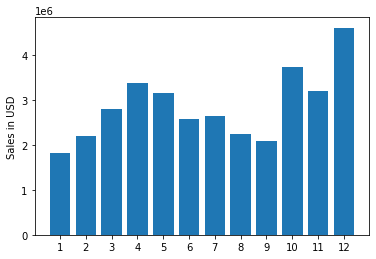

In [23]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.show()

In [24]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [25]:
all_data['city pin'] = pd.to_numeric(all_data['Purchase Address'].str[-6:])
all_data.groupby('city pin').sum()

,Unnamed: 0,Quantity Ordered,Price Each,month,Sales
city pin,,,,,
2215,165756862,22528,3.637410e+06,141112,3.661642e+06
4101,20641101,2750,4.471893e+05,17144,4.497583e+05
10001,208437016,27932,4.635371e+06,175741,4.664317e+06
30301,122926682,16602,2.779908e+06,104794,2.795499e+06
73301,82708484,11153,1.809874e+06,69829,1.819582e+06
75001,124306979,16730,2.752628e+06,104620,2.767975e+06
90001,247740271,33289,5.421435e+06,208325,5.452571e+06
94016,372564743,50239,8.211462e+06,315520,8.262204e+06
97035,83401360,11303,1.860558e+06,70621,1.870732e+06


In [26]:
all_data[all_data['city pin'] == 94016]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city pin
5,5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,94016
8,8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,94016
16,16,176573,USB-C Charging Cable,1,11.95,04/27/19 18:41,"214 Chestnut St, San Francisco, CA 94016",4,11.95,94016
28,28,176584,Flatscreen TV,1,300.00,04/24/19 20:39,"936 Church St, San Francisco, CA 94016",4,300.00,94016
31,31,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,94016
...,...,...,...,...,...,...,...,...,...,...
186843,11680,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,94016
186845,11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,94016
186846,11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,94016
186847,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,94016


In [27]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [29]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city pin,Hour
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,75001,8
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,2215,22
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,90001,14
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,90001,14
4,4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,90001,9


In [30]:
hours = [hour for hour, df in all_data.groupby('Hour')]
all_data.groupby('Hour').count()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city pin
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [33]:
aa = df.groupby('Order ID')
aa['Product']